In [544]:
# %load_ext autoreload
# %autoreload 2

In [543]:
# from ZGlobalLib.gpu_utils import use_gpu
# use_gpu(1)

In [554]:
from HistoLib import generator
from HistoLib import utils
from HistoLib import models
from HistoLib import traintest
from HistoLib import gradcam

In [536]:
resolution = '20x'      # One of ['20x', '40x', None]
class_type = 'macro'    # One of ['macro', 'micro']
exclude_pd = False
train_split = 0.8
val_split = 0.1

In [562]:
utils.dataset_description()

Total images 981
Total patients 45


20x_ID  40x_ID  20x_noID  40x_noID  20x  40x
aca_bd      58      46        29        25   87   71
aca_md      44      46        34        22   78   68
aca_pd      45      42         8        14   53   56
nor         85      66         0         0   85   66
scc_bd      50      49        31        24   81   73
scc_md      30      36        30        20   60   56
scc_pd      48      47        23        29   71   76
Total      360     332       155       134  515  466

## Get images

In [535]:
train_generator, val_generator, test_generator, class_names = generator.get_patient_generators(resolution, 
                                                                                               class_type, exclude_pd, batch_size=8, 
                                                                                               train_split=train_split, 
                                                                                               val_split=val_split,
                                                                                               debug=True
                                                                                              )

Images (300x400)      Training: 263 | Validation: 49  | Test: 48  | Total: 360
Patients              Training: 29  | Validation: 5   | Test: 4   | Total: 38 
Class aca    (id 0)   Training: 109 | Validation: 20  | Test: 18  | Total: 147
Class nor    (id 1)   Training: 52  | Validation: 14  | Test: 19  | Total: 85 
Class scc    (id 2)   Training: 102 | Validation: 15  | Test: 11  | Total: 128


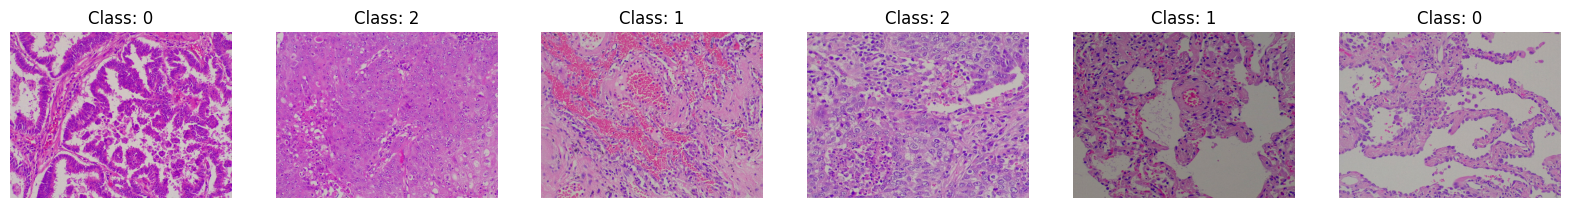

In [532]:
train_generator.show_generator()

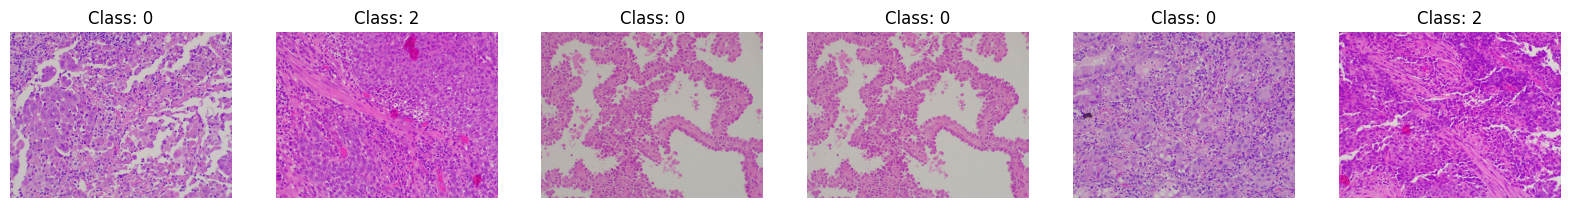

In [533]:
val_generator.show_generator()

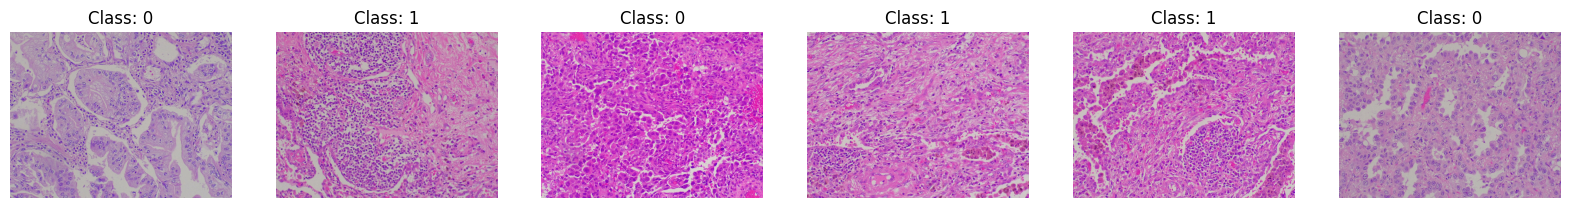

In [534]:
test_generator.show_generator()

## Train Model

In [509]:
class_weights = utils.compute_weights(train_generator)
num_classes = len(class_weights)
model, model_name = models.get_model(train_generator, 'ResNet50')

In [510]:
log_dir = traintest.get_logdir(model_name)# + '_5class'
log_dir

'logs/20240305-090130/ResNet50V2'

In [511]:
# Train the model using the custom data generators and the debugging callback
model = traintest.compile_model(model, num_classes, init_lr=1e-5)
history = traintest.train_model(model, train_generator, val_generator, class_weights, log_dir)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Loading weights with best iteration...


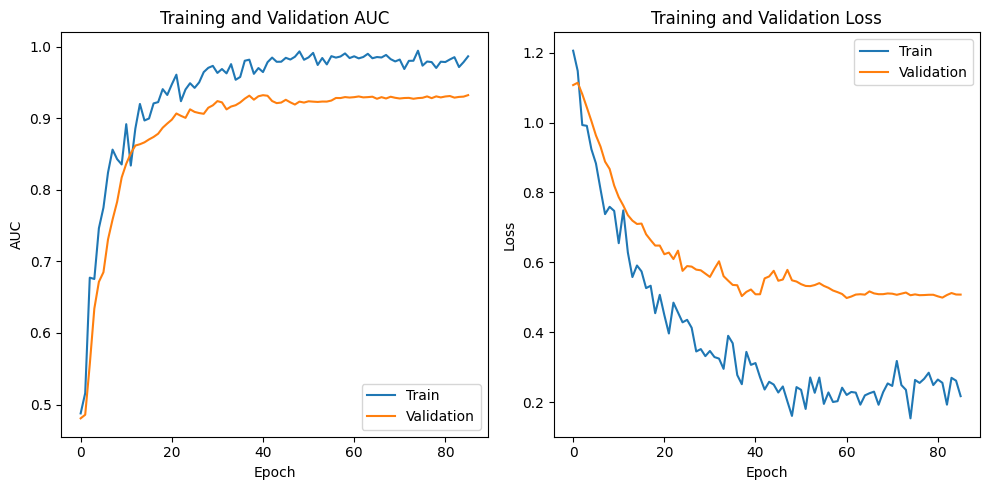

In [512]:
#Plot metrics
traintest.plot_metrics(history)

## Evaluate using test data

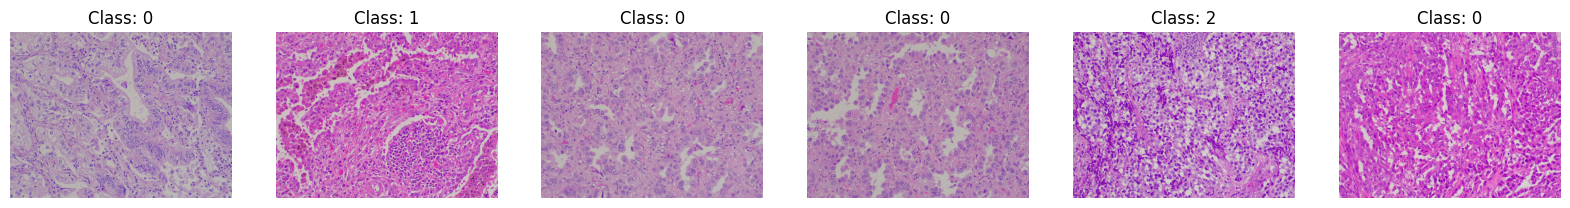

In [561]:
test_generator.show_generator()

Test AUC: 0.96
Test Accuracy: 0.83
Test Precision: 0.81
Test Recall: 0.80


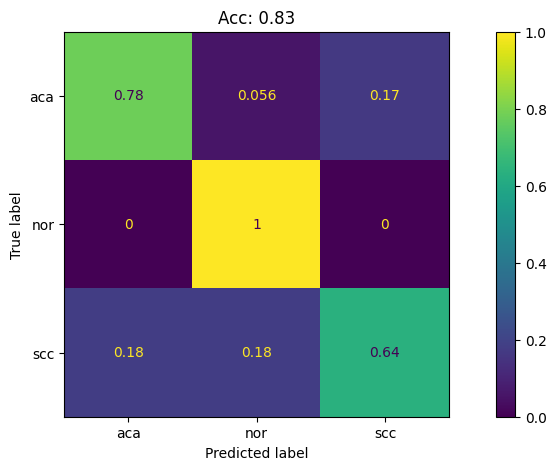

In [560]:
traintest.test_model(model, test_generator, class_names)

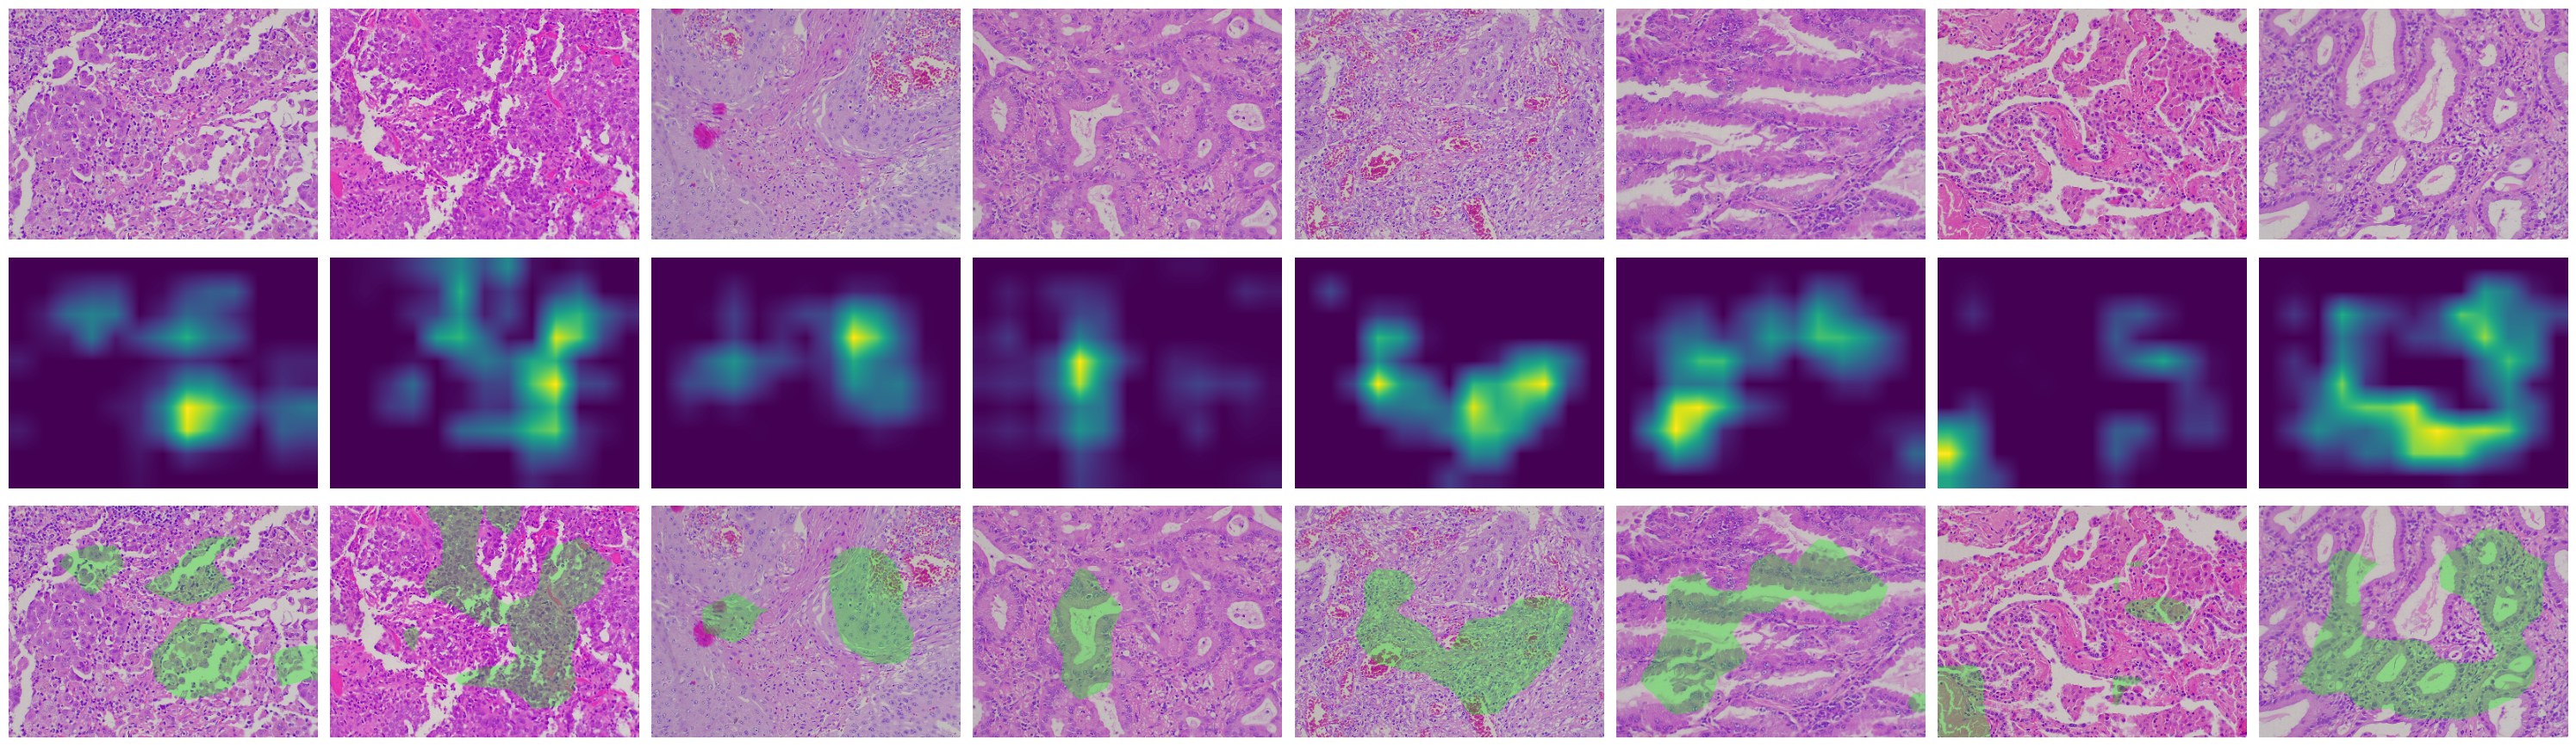

In [556]:
gradcam.generate_gradcam_samples(model, val_generator)